# Time series forecating using python

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline 

## Define Time series based on annual frequency

In [6]:
# define data - - - oil production in saudi arabia from 1996 to 2007
data = [446.6565, 454.4733, 455.663, 423.6322, 456.2713, 425.3325, 440.3325, 485.1494, 506.0482, 526.792, 514.2689, 494.211]

In [7]:
data

[446.6565,
 454.4733,
 455.663,
 423.6322,
 456.2713,
 425.3325,
 440.3325,
 485.1494,
 506.0482,
 526.792,
 514.2689,
 494.211]

In [8]:
# define a fixed frequency " datetimeindex" corresponding to data
index = pd.date_range(start = "1996", end = "2008", freq = "A")

In [9]:
index

DatetimeIndex(['1996-12-31', '1997-12-31', '1998-12-31', '1999-12-31',
               '2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [10]:
type(index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
# time series data
oildata = pd.Series(data,index)

In [12]:
type(oildata)

pandas.core.series.Series

In [13]:
oildata

1996-12-31    446.6565
1997-12-31    454.4733
1998-12-31    455.6630
1999-12-31    423.6322
2000-12-31    456.2713
2001-12-31    425.3325
2002-12-31    440.3325
2003-12-31    485.1494
2004-12-31    506.0482
2005-12-31    526.7920
2006-12-31    514.2689
2007-12-31    494.2110
Freq: A-DEC, dtype: float64

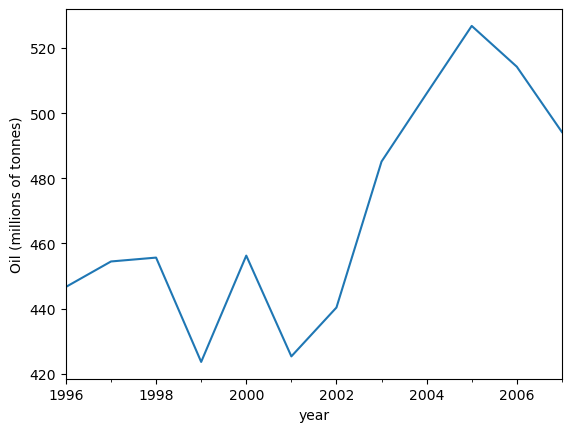

Oil production in saudi arabia from 1996 to 2007


In [14]:
ax=oildata.plot()
ax.set_xlabel("year")
ax.set_ylabel("Oil (millions of tonnes)")
plt.show()
print("Oil production in saudi arabia from 1996 to 2007")

In [15]:
# Moving average method
oildata.rolling(window=2).mean()

1996-12-31          NaN
1997-12-31    450.56490
1998-12-31    455.06815
1999-12-31    439.64760
2000-12-31    439.95175
2001-12-31    440.80190
2002-12-31    432.83250
2003-12-31    462.74095
2004-12-31    495.59880
2005-12-31    516.42010
2006-12-31    520.53045
2007-12-31    504.23995
Freq: A-DEC, dtype: float64

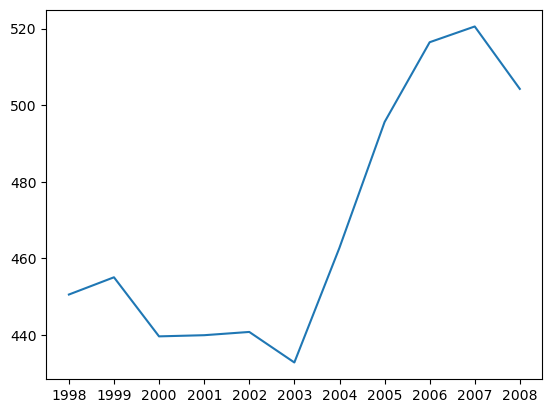

In [16]:
plt.plot(oildata.rolling(window=2).mean())

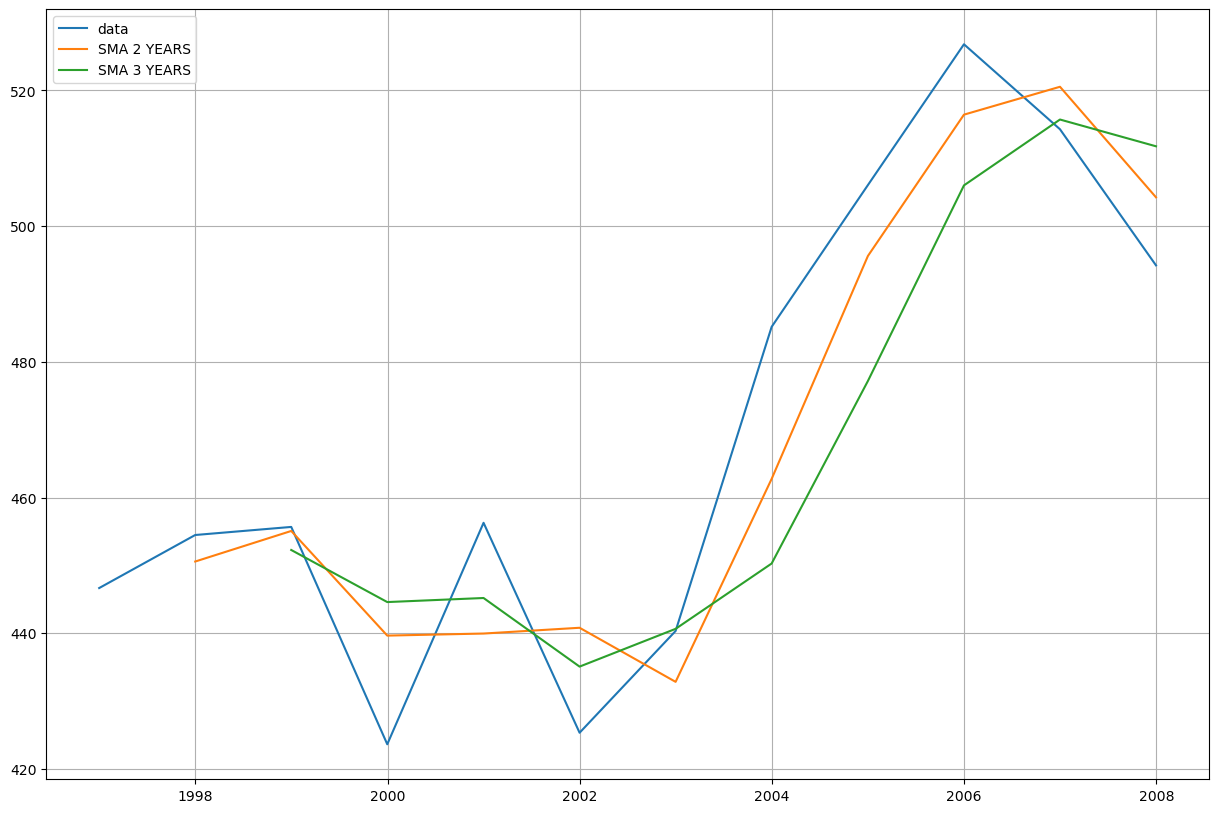

In [17]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(oildata,label="data")
plt.plot(oildata.rolling(window=2).mean(),label="SMA 2 YEARS")
plt.plot(oildata.rolling(window=3).mean(),label="SMA 3 YEARS")
plt.legend(loc=2)

## Exponential smoothing Models

### Simple Exponential Smoothing 

In [18]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [20]:
# simple exponential smoothing method --- with alpha = 0.20
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.2, optimized = False)

In [22]:
# fitted values
fit1.fittedvalues

1996-12-31    446.656500
1997-12-31    446.656500
1998-12-31    448.219860
1999-12-31    449.708488
2000-12-31    444.493230
2001-12-31    446.848844
2002-12-31    442.545575
2003-12-31    442.102960
2004-12-31    450.712248
2005-12-31    461.779439
2006-12-31    474.781951
2007-12-31    482.679341
Freq: A-DEC, dtype: float64

In [28]:
# model parameters
fit1.params_formatted

,name,param,optimized
smoothing_level,alpha,0.2000,False
initial_level,l.0,446.6565,False
